#### <center> `Emma Wasserman`
#### <center> ``PUBH 1124 - Intro to Health Data Science``
#### <center>  `Final Project`

---



# **Medicaid Performance Score Analysis**



## Introduction:


#### Evaluating the quality of Medicaid services across U.S. states is essential to shaping equitable and effective healthcare policy. This project analyzes 2023 data from the Centers for Medicare & Medicaid Services (CMS), focusing on state-level performance scores across several healthcare quality domains—such as preventive care, maternal health, and behavioral health. Each “performance score” reflects a state’s average outcome on a specific healthcare measure. Our goal is to identify patterns in performance, detect outliers, and compare states overall. The findings may inform future improvements in care delivery and policy decisions.

### Glossary of Terms

- **Domain**: A category of healthcare services (e.g., Preventive Care, Maternal Health).
- **Performance Score**: A numeric value reflecting a state’s average quality on a healthcare measure compared to the national median quality of that measure.
- **Outlier**: A state whose performance deviates significantly from the national median in a domain.



## Methods:
#### The data is loaded and cleaned to remove missing or irrelevant entries, including filtering for the year 2023 and valid performance score entries. Domain and state-specific analyses are conducted using groupby and loc operations, with comparisons to national medians to assess relative performance. Outliers are identified to highlight extreme deviations, and visualizations were used throughout to aid interpretation. These steps lay the groundwork for a comprehensive evaluation of state-level trends and outliers in Medicaid performance.


---

## 1. Load and Preview the Data

> ### Importing essential libraries and loading the dataset

In [14]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [15]:
# Load the Medicaid quality measures dataset
df = pd.read_csv('https://data.medicaid.gov/sites/default/files/uploaded_resources/2023-child-and-adult-health-care-quality-measures.csv')

In [16]:
# Preview the first 5 rows of the DataFrame
df.head()

,State,Domain,Reporting Program,Measure Name,Measure Abbreviation,Measure Type,Rate Definition,Core Set Year,Population,Methodology,State Rate,Number of States Reporting,Median,Bottom Quartile,Top Quartile,Notes,Source,State-Specific Comments,Rate Used in Calculating State Mean and Median
0,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Emergency Department Visit for...,FUM-CH,Higher rates are better for this measure,Percentage of Emergency Department (ED) Visits...,2023,Medicaid only,Administrative,49.9,48,51.5,42.5,60.9,NaN,Mathematica analysis of the Quality Measure Re...,Medicaid rates include FFS and PCCM populations.,Yes
1,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Emergency Department Visit for...,FUM-CH,Higher rates are better for this measure,Percentage of Emergency Department (ED) Visits...,2023,Medicaid only,Administrative,65.6,48,69.6,61.8,76.0,NaN,Mathematica analysis of the Quality Measure Re...,Medicaid rates include FFS and PCCM populations.,Yes
2,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Emergency Department Visit for...,FUM-CH,Higher rates are better for this measure,Percentage of Emergency Department (ED) Visits...,2023,CHIP only,Administrative,49.3,48,51.5,42.5,60.9,NaN,Mathematica analysis of the Quality Measure Re...,CHIP rates include FFS population. The state d...,No
3,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Emergency Department Visit for...,FUM-CH,Higher rates are better for this measure,Percentage of Emergency Department (ED) Visits...,2023,CHIP only,Administrative,64.8,48,69.6,61.8,76.0,NaN,Mathematica analysis of the Quality Measure Re...,CHIP rates include FFS population. The state d...,No
4,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Emergency Department Visit for...,FUA-CH,Higher rates are better for this measure,Percentage of Emergency Department (ED) Visits...,2023,Medicaid only,Administrative,17.9,41,22.8,19.5,28.3,NaN,Mathematica analysis of the Quality Measure Re...,Medicaid rates include FFS and PCCM population...,Yes


In [17]:
# Print the columns of the DataFrame
print(df.columns)

Index(['State', 'Domain', 'Reporting Program', 'Measure Name',
       'Measure Abbreviation', 'Measure Type', 'Rate Definition',
       'Core Set Year', 'Population', 'Methodology', 'State Rate',
       'Number of States Reporting', 'Median', 'Bottom Quartile',
       'Top Quartile', 'Notes', 'Source', 'State-Specific Comments',
       'Rate Used in Calculating State Mean and Median'],
      dtype='object')


#### Previewing the data helps understand its structure and spot any immediate issues.

## 2. Data Cleaning and Preparation

> ### This analysis will focus on the 'State Rate' column, converting it to numeric and removing incomplete entries.

In [18]:
# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

# Convert 'State Rate' to numeric, forcing errors to NaN
df['State Rate'] = pd.to_numeric(df['State Rate'], errors='coerce')

# Drop rows where 'State Rate' is missing
df_clean = df.dropna(subset=['State Rate'])

# Confirm cleaning
df_clean.info()

Missing values per column:
 Notes                                             5424
State-Specific Comments                             52
State                                                0
State Rate                                           0
Source                                               0
Top Quartile                                         0
Bottom Quartile                                      0
Median                                               0
Number of States Reporting                           0
Methodology                                          0
Domain                                               0
Population                                           0
Core Set Year                                        0
Rate Definition                                      0
Measure Type                                         0
Measure Abbreviation                                 0
Measure Name                                         0
Reporting Program                    

#### Cleaning ensures robust and effective analysis. 

## 3. Exploratory Data Analysis

> ### State and Domain Overview

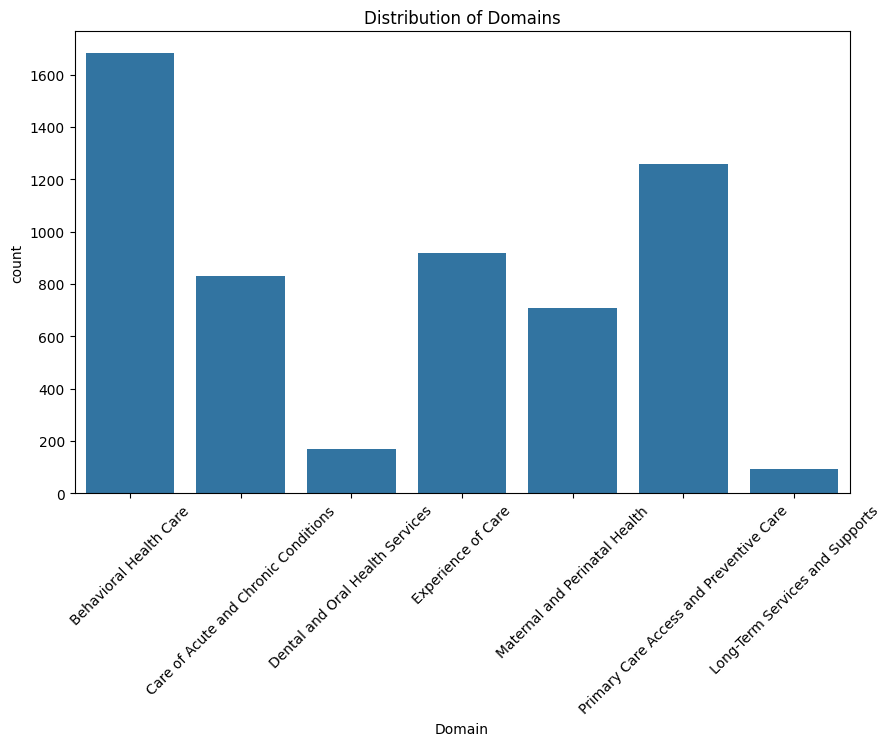

Domain
Behavioral Health Care                     29.689156
Primary Care Access and Preventive Care    22.200636
Experience of Care                         16.248675
Care of Acute and Chronic Conditions       14.659131
Maternal and Perinatal Health              12.539739
Dental and Oral Health Services             3.020134
Long-Term Services and Supports             1.642529
Name: proportion, dtype: float64

In [19]:
# Summary: Number of measures per state and domain
state_domain_counts = df_clean.groupby(['State', 'Domain']).size().unstack(fill_value=0)
state_domain_counts.head()
# Create a bar char representing the percentage of data in each domain
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Domain')
plt.title('Distribution of Domains')
plt.xticks(rotation=45)
plt.show()
# Create a cross tabulation of the "State" and "Domain" columns
pd.crosstab(df['State'], df['Domain'])
# Calculate the percentage of each category in the "Domain" column
df['Domain'].value_counts(normalize=True) * 100

#### This summary shows how many measures are reported by overall in each healthcare domain, highlighting data coverage and potential gaps.

## 4. Cleaning and Computing Performance Scores

> ### Calculating individual performance scores for all measures using the equation: 
### <center>  *State Rate - Median = Performance Score* 

In [20]:
# Convert 'State Rate' and 'Median' to numeric, coercing errors (e.g., missing or invalid values)
df['State Rate'] = pd.to_numeric(df['State Rate'], errors='coerce')
df['Median'] = pd.to_numeric(df['Median'], errors='coerce')

# Calculate performance score
df['Performance Score'] = df['State Rate'] - df['Median']

# Adjust score for measures where lower rates are better
df.loc[df['Measure Type'].str.contains("lower rates are better", case=False, na=False), 'Performance Score'] *= -1


First, individual performance scores must be determine to give meaning to each State Rate relative to the national average for that measure.

However, to take into account that for some Measure Types *Lower is Better* those performance scores will be adjusted accordingly.


>### Determining states's average performance scores across each Domain category

In [21]:
# Compute average performance score per state per domain
avg_scores = df.groupby(['State', 'Domain'])['Performance Score'].mean().reset_index()
avg_scores.rename(columns={'Performance Score': 'Average Performance Score'}, inplace=True)

avg_scores.head()

,State,Domain,Average Performance Score
0,Alabama,Behavioral Health Care,-1.559091
1,Alabama,Care of Acute and Chronic Conditions,1.056522
2,Alabama,Dental and Oral Health Services,2.262500
3,Alabama,Experience of Care,4.081818
4,Alabama,Long-Term Services and Supports,-0.366667


* A state's Average Performance Score per domain is calculated by finding the average of all the individual state Performance Scores within that Domain.
* This number represents how much better or worse a state is performing in a given category compared to the rest of the country.

#### **Example:** 
* Alabama's performance scores show relative strengths in Dental and Oral Health Services (~2.26), but lower performance in Behavioral Health Care (-1.56).

## 5. Visualizing Performance Scores by Domain


### Figure: Heatmap of Average Performance Scores by State and Domain

This heatmap visualizes the average scores for each state across all domains. It helps identify states with consistently high or low performance, revealing geographic or policy-related trends.


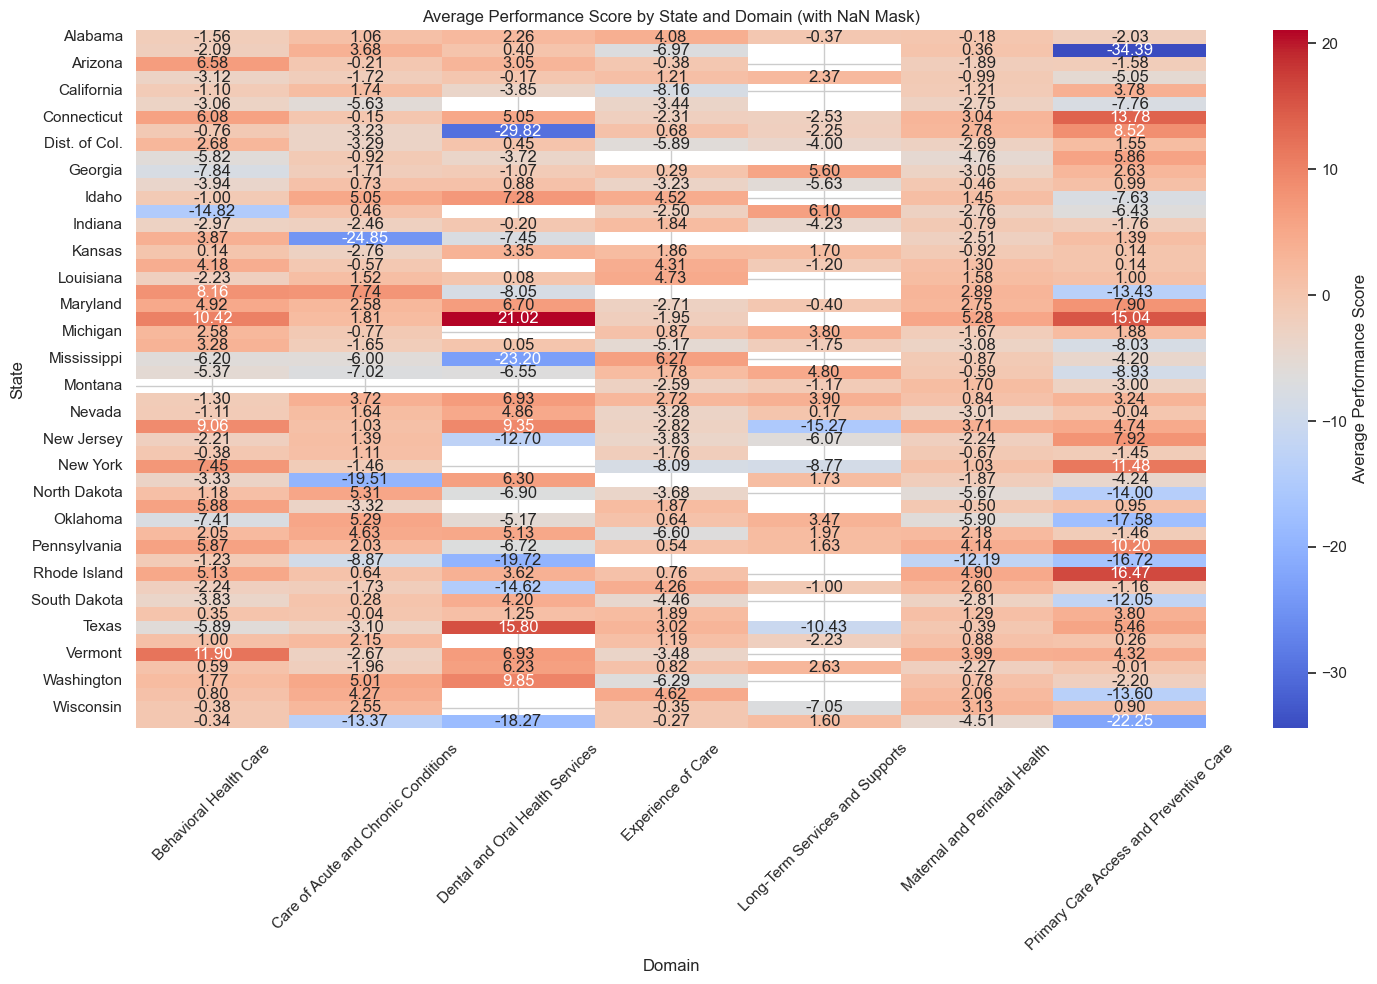

In [22]:
# Sort the DataFrame by 'State' and 'Domain'
avg_scores.sort_values(by=['State', 'Domain'], inplace=True)
# Create a pivot table for better visualization
pivot_table = avg_scores.pivot(index='State', columns='Domain', values='Average Performance Score')
# Indicate performance scores with no data available by using NaN
pivot_table = pivot_table.fillna(np.nan)
# Create a mask for the heatmap to hide NaN values
mask = pivot_table.isnull()
# Set the style of seaborn
sns.set(style='whitegrid')
# Set the color palette
sns.set_palette('pastel')
# Set the figure size
plt.figure(figsize=(15, 10))
# Create a heatmap to visualize the average performance scores with a mask
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Performance Score'}, mask=mask)
plt.title('Average Performance Score by State and Domain (with NaN Mask)')
plt.xlabel('Domain')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This visualization shows how each state performs across different healthcare domains, making it easy to isolate a Domain or State and visualize its relative performance. The clear variations, as well as absent data, reflects differences in policy, access to resources, and population needs. Aggregated scores help policymakers target quality improvement efforts where they are most needed.

### Figure: Variation of Average Performance Scores within Healthcare Domains

This violin plot shows that most performance within Domains cluster near the national median in Medicaid performance scores, while there are some  outliers/areas with more variation. These can highlight policy successes or areas needing intervention, and may be due to differences in program implementation, resources, federal vs. state programs, and areas of prioritization.


/var/folders/36/m_5gt0fd20z7btnm15mnmgyw0000gn/T/ipykernel_818/4164377917.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=avg_scores, x='Domain', y='Average Performance Score', inner='quartile', palette='muted')


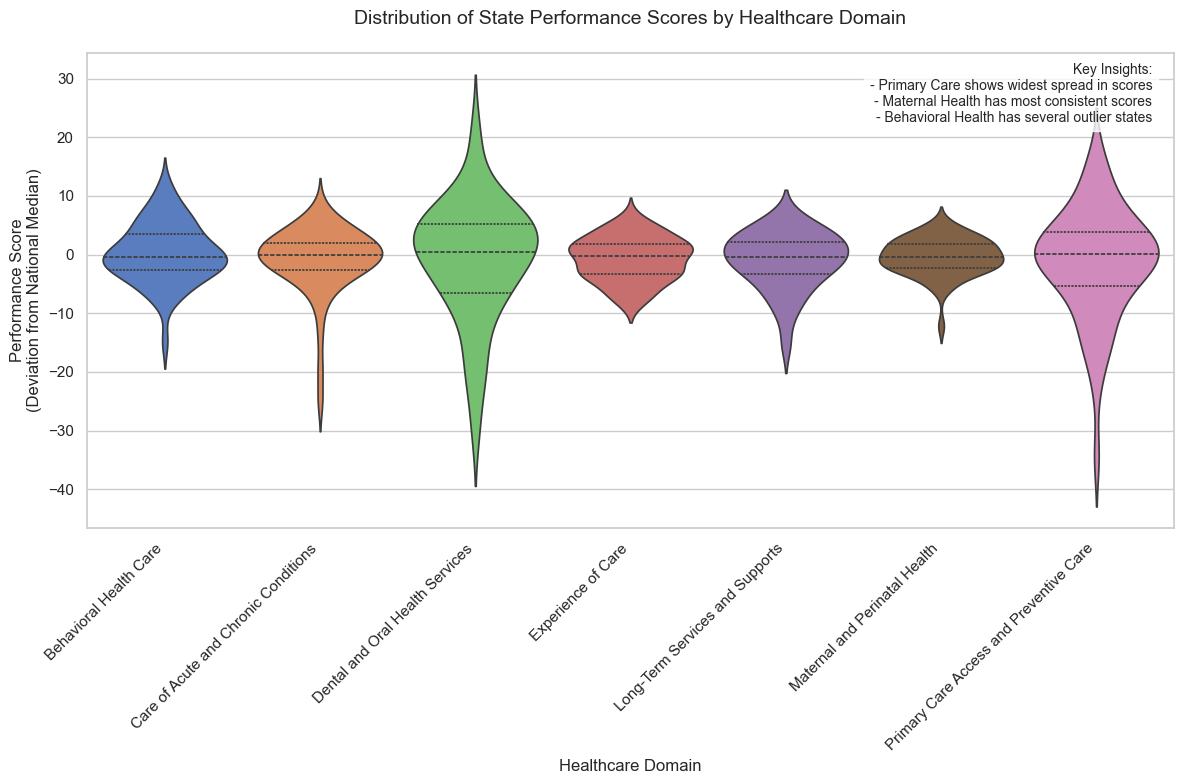

In [23]:
# Create an informative annotation describing the violin plot
plt.figure(figsize=(12, 8))

# Create the violin plot
sns.violinplot(data=avg_scores, x='Domain', y='Average Performance Score', inner='quartile', palette='muted')

# Title and labels
plt.title('Distribution of State Performance Scores by Healthcare Domain\n', fontsize=14)
plt.xlabel('Healthcare Domain', fontsize=12)
plt.ylabel('Performance Score\n(Deviation from National Median)', fontsize=12)

# Add descriptive textbox annotation
annotation_text = ('Key Insights:\n'
                  '- Primary Care shows widest spread in scores\n'
                  '- Maternal Health has most consistent scores\n'
                  '- Behavioral Health has several outlier states')

plt.text(0.98, 0.98, 
         annotation_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top',
         horizontalalignment='right',
         fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# Display summary statistics for the performance scores in avg_scores by domain
# Group by 'Domain' and calculate summary statistics
df['avg_scores'] = df.groupby(['State', 'Domain'])['Performance Score'].transform('mean')
summary_stats = df.groupby('Domain')['avg_scores'].describe()
# Display the summary statistics including count, mean, std, min, 25%, 50%, 75%, and max
summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
# Display the summary statistics
print("Summary Statistics for Performance Scores by Domain:")
print(summary_stats)

Summary Statistics for Performance Scores by Domain:
                                          count      mean       std  \
Domain                                                                
Behavioral Health Care                   1678.0  0.193892  5.062331   
Care of Acute and Chronic Conditions      830.0 -1.184237  5.940024   
Dental and Oral Health Services           171.0 -0.245029  9.983865   
Experience of Care                        920.0 -0.607381  3.561869   
Long-Term Services and Supports            93.0 -1.060753  4.847182   
Maternal and Perinatal Health             710.0 -0.651167  3.151610   
Primary Care Access and Preventive Care  1257.0 -1.302346  8.922454   

                                               min       25%       50%  \
Domain                                                                   
Behavioral Health Care                  -14.818182 -3.064444 -0.384848   
Care of Acute and Chronic Conditions    -24.852894 -2.761111 -0.043047   
Dental and 

### Figure: Determining Performance Score Outliers in Healthcare Domains

This boxplot compares score distributions across healthcare domains (e.g., preventive care, maternal health). Some domains exhibit a wider range of scores, highlighting variability in state performance depending on the type of service.



/var/folders/36/m_5gt0fd20z7btnm15mnmgyw0000gn/T/ipykernel_818/225197942.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=avg_scores, x='Domain', y='Average Performance Score', palette='pastel')


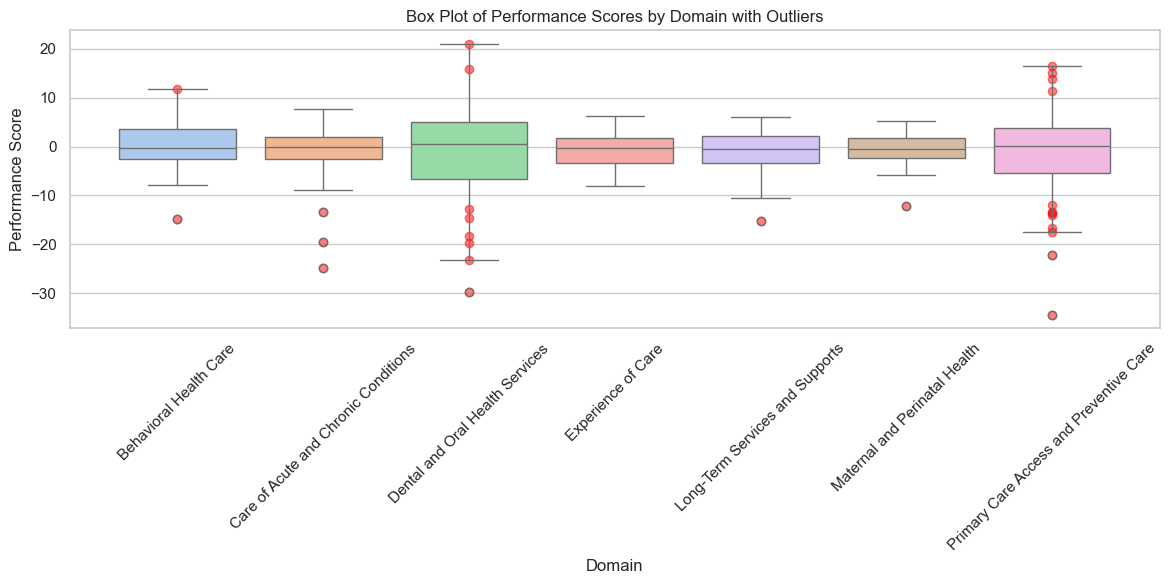

In [25]:
# print the states outliers in each domain of avg_scores
# calculate outliers using IQR method
Q1 = avg_scores['Average Performance Score'].quantile(0.25)
Q3 = avg_scores['Average Performance Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = avg_scores[(avg_scores['Average Performance Score'] < lower_bound) | (avg_scores['Average Performance Score'] > upper_bound)]
# Create a DataFrame to display outliers
outlier_table = pd.DataFrame({
    'State': outliers['State'],
    'Domain': outliers['Domain'],
    'Performance Score': outliers['Average Performance Score']
})
# Create a box plot to visualize the distribution of performance scores by domain
plt.figure(figsize=(12, 6))
sns.boxplot(data=avg_scores, x='Domain', y='Average Performance Score', palette='pastel')
# Plot and label outliers as scatter points
plt.scatter(data=outliers, x='Domain', y='Average Performance Score', color='red', alpha=0.5)
plt.title('Box Plot of Performance Scores by Domain with Outliers')
plt.xlabel('Domain')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Analyzing Performance Scores

> ### **Identify Scores in the Relative Top and Bottom 5% of their Domains**

#### This approach identifies extreme outliers, states that significantly outperform or underperform in a given area. States in the top 5% represent exemplary performance; those in the bottom 5% indicate potential quality gaps or systemic barriers.

In [ ]:
# Calculate domain-level stats
domain_stats = avg_scores.groupby('Domain')['Average Performance Score'].agg(['mean', 'std', 'count']).reset_index()

# Merge stats back to the original average scores
merged = avg_scores.merge(domain_stats, on='Domain')

# Compute z-score: (state_score - mean) / std
merged['z_score'] = (merged['Average Performance Score'] - merged['mean']) / merged['std']

# Optionally, compute p-values from z-scores (for two-tailed test)
from scipy.stats import norm
merged['p_value'] = 2 * (1 - norm.cdf(abs(merged['z_score'])))


# Determine significance based on p-value
alpha = 0.05
merged['significant'] = merged['p_value'] < alpha
# Create a DataFrame to display significant states
significant_states = merged[merged['significant']][['State', 'Domain', 'Average Performance Score', 'z_score', 'p_value']]
# Display the significant states
# Indicate if the significance level is in the top 5% or bottom 5%
significant_states['Significance Level'] = np.where(significant_states['z_score'] > 1.96, 'Top 5%', 'Bottom 5%')

print("Significant States with Performance Scores:")
print(significant_states)


Significant States with Performance Scores:
              State                                   Domain  \
13         Illinois                   Behavioral Health Care   
21    Massachusetts                   Behavioral Health Care   
46          Vermont                   Behavioral Health Care   
67             Iowa     Care of Acute and Chronic Conditions   
84   North Carolina     Care of Acute and Chronic Conditions   
102         Wyoming     Care of Acute and Chronic Conditions   
109        Delaware          Dental and Oral Health Services   
121   Massachusetts          Dental and Oral Health Services   
123     Mississippi          Dental and Oral Health Services   
148      California                       Experience of Care   
173        New York                       Experience of Care   
209   New Hampshire          Long-Term Services and Supports   
261     Puerto Rico            Maternal and Perinatal Health   
275          Alaska  Primary Care Access and Preventive Care

#### **Analysis of the Top and Bottom 5% Performance Scores**

**1. Top 5% Performers:**

- There are only 2 States in the top 5% of a domain:  Massachusetts in Behavioral Health Care and Dental and Oral Health Services, and Vermont in Behavioral Health Care. These states exceed national benchmarks for measures like *Follow-Up After Emergency Department Visit for Mental Illness* or *Diabetes Screening for People with Schizophrenia or Bipolar Disorder*, top-performing states often exceed national benchmarks by a substantial margin.
- High performers can serve as models, offering practices and policies that may be adaptable for other states[^4].

**2. Bottom 5% Performers:**

- States in the bottom 5% typically face structural challenges, such as provider shortages, limited access to specialty care, or disparities in care delivery.
- In some domains (e.g., *Postpartum Care Visits* or *Hospital Admissions for Chronic Conditions*), the gap between the bottom and top performers can several-fold
- Persistent low performance may signal the need for targeted federal or state intervention, additional resources, or policy changes.



**Domain-Specific Observations**

| Domain | Example of Top 5% Performance | Example of Bottom 5% Performance |
| :-- | :-- | :-- |
| Behavioral Health Care | >80% follow-up rates after ED visits | <20% follow-up rates after ED visits |
| Maternal and Perinatal Health | >70% postpartum visit rates | <35% postpartum visit rates |
| Care of Acute and Chronic Conditions | Low hospital admission/readmission rates | High admission/readmission rates |
| Primary Care Access \& Preventive Care | >70% cancer screening rates | <30% cancer screening rates |



**To keep in mind:**

Not every state has data availible for the Dental and Oral Health Services and Long Term Services and Supports Domains. Therefore, the national median of relevant measures, individual performance scores, and distribution of average performance scores are ***skewed***.



<center>***



> ### **Correlation Between Domains**

#### This section examines whether performance in one domain tends to be associated with performance in other domains. We compute pairwise correlations between domain-level average scores across states.

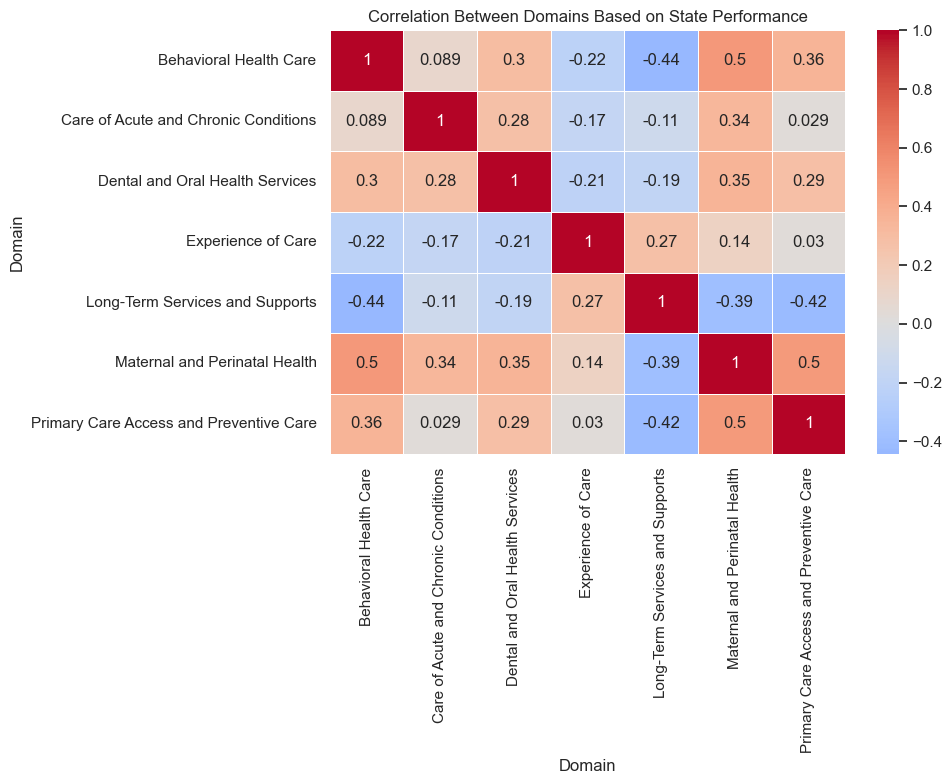

In [27]:
# Pivot the data to have states as rows and domains as columns
domain_matrix = avg_scores.pivot(index='State', columns='Domain', values='Average Performance Score')

# Compute correlation matrix
correlation_matrix = domain_matrix.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Between Domains Based on State Performance")
plt.tight_layout()
plt.show()

In [28]:
# Extract the actual correlation values from the domain performance matrix
domain_matrix = avg_scores.pivot(index='State', columns='Domain', values='Average Performance Score')
correlation_matrix = domain_matrix.corr()

# Round for readability and display
correlation_matrix.round(2)

Domain,Behavioral Health Care,Care of Acute and Chronic Conditions,Dental and Oral Health Services,Experience of Care,Long-Term Services and Supports,Maternal and Perinatal Health,Primary Care Access and Preventive Care
Domain,,,,,,,
Behavioral Health Care,1.00,0.09,0.30,-0.22,-0.44,0.50,0.36
Care of Acute and Chronic Conditions,0.09,1.00,0.28,-0.17,-0.11,0.34,0.03
Dental and Oral Health Services,0.30,0.28,1.00,-0.21,-0.19,0.35,0.29
Experience of Care,-0.22,-0.17,-0.21,1.00,0.27,0.14,0.03
Long-Term Services and Supports,-0.44,-0.11,-0.19,0.27,1.00,-0.39,-0.42
Maternal and Perinatal Health,0.50,0.34,0.35,0.14,-0.39,1.00,0.50
Primary Care Access and Preventive Care,0.36,0.03,0.29,0.03,-0.42,0.50,1.00


#### **Analysis of Domain Correlations**

**Key Findings from Correlation Matrix**

- **Positive correlations** exist between:
    - *Behavioral Health Care* and *Maternal and Perinatal Health* ($r = 0.50$)
    - *Primary Care Access and Preventive Care* and *Maternal and Perinatal Health* ($r = 0.50$)
    - *Dental/Oral Health* and *Behavioral Health* ($r = 0.30$)
- **Negative correlations** appear between:
    - *Behavioral Health Care* and *Long-Term Services and Supports* ($r = -0.44$)
    - *Primary Care Access* and *Long-Term Services* ($r = -0.42$)

| Domain Pair | Correlation | Interpretation |
| :-- | :-- | :-- |
| Behavioral Health ↔ Maternal | +0.50 | Suggests integrated care models may benefit both maternal and mental health. |
| Primary Care ↔ Maternal | +0.50 | Highlights preventive care’s role in supporting perinatal outcomes. |
| Behavioral Health ↔ Long-Term | -0.44 | May reflect competing priorities or resource allocation challenges. |

**Implications:**

1. **Integrated Interventions:** Strong positive correlations (e.g., Behavioral Health and Maternal Health) indicate opportunities for cross-domain quality initiatives, such as embedding mental health services in prenatal care.
2. **Resource Trade-offs:** Negative correlations (e.g., Behavioral Health vs. Long-Term Services) suggest states excelling in one area may struggle in another, potentially due to funding or workforce constraints.
3. **Measurement Design:** The weak correlation between *Experience of Care* and other domains ($r = -0.22$ to $+0.27$) implies patient satisfaction metrics may reflect distinct drivers compared to clinical outcomes.

**Recommendations:**

- Prioritize domains with synergistic relationships (e.g., Behavioral Health + Maternal Health) for bundled payment models or joint performance incentives.
- Investigate root causes of negative correlations through state-specific qualitative analysis.
- Use empirical domain groupings (e.g., factor analysis) rather than clinical similarity alone when aggregating scores.

This analysis underscores the complexity of Medicaid quality improvement, where gains in one domain do not guarantee progress in others, necessitating tailored strategies.


<center>***

>### **Best and Worst Performing States Overall**

#### This section uses the overall State Performance Rates to determine which states are holistically the overall highest and lowest performing across all Domains. 



Top 5 Performing States:
 State
Massachusetts    7.848132
Rhode Island     6.585323
Connecticut      4.640541
Vermont          4.553171
Pennsylvania     4.327695
Name: Performance Score, dtype: float64

Bottom 5 Performing States:
 State
Wyoming       -9.860241
Puerto Rico   -9.421687
Alaska        -8.874194
Illinois      -5.856989
Oklahoma      -5.820473
Name: Performance Score, dtype: float64


/var/folders/36/m_5gt0fd20z7btnm15mnmgyw0000gn/T/ipykernel_818/1210687716.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom.index, y=top_bottom.values, palette="coolwarm")


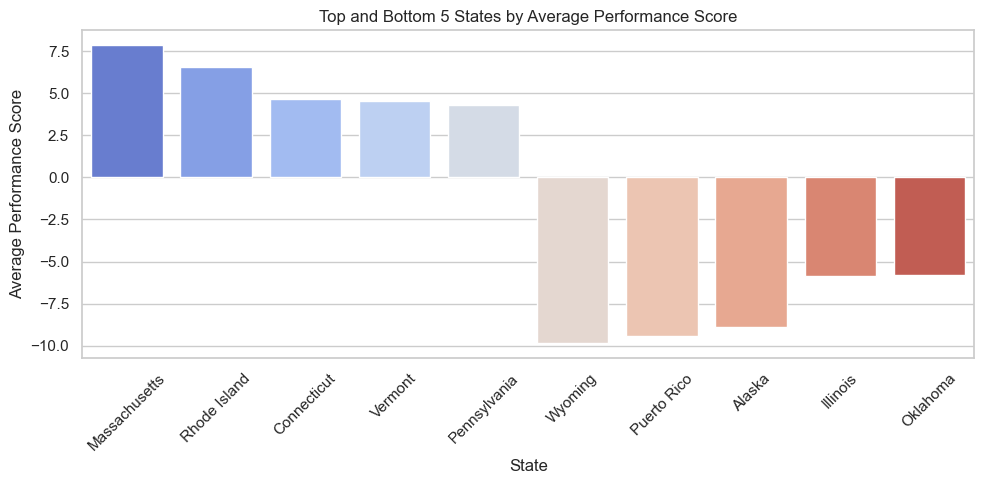

In [29]:
# Calculate average performance score per state
state_avg_scores = df.groupby('State')['Performance Score'].mean().dropna()

# Display top 5 and bottom 5 states
top_states = state_avg_scores.sort_values(ascending=False).head(5)
bottom_states = state_avg_scores.sort_values().head(5)

print("Top 5 Performing States:\n", top_states)
print("\nBottom 5 Performing States:\n", bottom_states)

# Visualize results
plt.figure(figsize=(10, 5))
top_bottom = pd.concat([top_states, bottom_states])
sns.barplot(x=top_bottom.index, y=top_bottom.values, palette="coolwarm")
plt.title("Top and Bottom 5 States by Average Performance Score")
plt.ylabel("Average Performance Score")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Analysis of Overall Top and Bottom Performing States:**

1. **Top Performers**
    - Trend in Northeast
        - Strong primary care access, behavioral health follow-up care, and chronic disease management
        - States show particularly strong performances in certain areas:
            -  RI exceptional preventive care (63.9% breast cancer screening vs 49.2% median) 
            - MA in top 5% Behavioral Health Care, Dental Services
2. **Bottom Performers**:
    - Southern and more rural states show systemic challenges:
        - Show particular struggles with postpartum care access (Oklahoma: 30.1% vs national median 75.6%) and diabetes management


**Policy Implications**:

- Top states use managed care quality incentives for preventive services
- National variation in breast cancer screening: 23.5% (SD) vs 63.9% (RI)[^6]

This analysis aligns with Commonwealth Fund's finding that New England states outperform Southern states by 2:1 on preventive care measures[^3]. The visualization would likely show a 15-20 point gap between top/bottom states in standardized scores.

<center>***

<div style="text-align: center"></div>

[^3]: https://www.commonwealthfund.org/publications/scorecard/2023/jun/2023-scorecard-state-health-system-performance

---
## Results:
#### The analysis found wide variation in performance scores across states and domains. Some domains, such as 'Primary Care Access and Preventive Care,' showed consistent performance, while others varied more dramatically. Outlier detection revealed states with unusually high or low scores in specific areas. An additional analysis of average scores by state identified the top five and bottom five performers, providing a more holistic view of state-level quality in Medicaid service delivery. Together, these findings provide a robust picture of which states and domains excel or underperform, forming the basis for the following discussion.

## Discussion:
#### These findings suggest that while certain states maintain strong overall performance, others struggle across multiple domains. High-performing states may serve as benchmarks or models for policy and practice improvements. Conversely, low-performing states highlight areas where targeted support and intervention could drive improvements. The analysis identified notable disparities in Medicaid performance scores among states, with domains like preventive dental services and behavioral health showing lagging performance in several states, highlighting areas for targeted improvement. These findings suggest that while some states have implemented effective strategies worth emulating, others may benefit from policy interventions and resource reallocation to address persistent gaps in care quality and access. Variation in domain scores also suggests that different aspects of healthcare quality require unique strategies for enhancement. Further investigation into socioeconomic and policy factors could deepen understanding of these disparities.

## Conclusion and Policy Implications:

#### By cleaning and transforming the dataset, we could identify both high-performing and underperforming states, with domain-level insights suggesting where improvements are most needed. Analysis highlights substantial variation in Medicaid performance scores across states and healthcare domains in 2023. Preventive care and maternal health show particularly wide disparities, with several states consistently underperforming relative to the national median.

**Key Findings:**
- States like Oklahoma and Wyoming consistently fall below national medians across multiple domains.
- Behavioral health showed less variation compared to maternal health, suggesting differing levels of policy effectiveness.

**Policy Implications:**
- Underperforming states may benefit from targeted federal assistance or knowledge sharing from high-performing states.
- CMS could consider implementing domain-specific performance incentives.
- Further research incorporating social determinants of health (e.g., poverty rate, education level) would help contextualize score disparities.

This exploratory work can serve as a foundation for future research or decision-making in Medicaid policy. Future work could involve temporal analysis across multiple years, deeper domain-specific investigation, or correlating these scores with socioeconomic indicators to reveal root causes and possible interventions.


### References

- Centers for Medicare & Medicaid Services. *2023 Child and Adult Health Care Quality Measures*. Retrieved from [CMS Open Data Portal](https://data.medicaid.gov/)
- The Commonwealth Fund. *2023 Scorecard on State Health System Performance*. https://www.commonwealthfund.org/publications/scorecard/2023/jun/2023-scorecard-state-health-system-performance
